In [1]:
#!/usr/bin/python
import argparse

# We want the user to input the neutrino event's RA, DEC, and the radius of its error circle:

parser = argparse.ArgumentParser()
parser.add_argument('-r', '--RA', type = float, dest = 'RA', help = 'enter right ascension in degrees')
parser.add_argument('-d', '--DEC', type = float, dest = 'DEC', help = 'enter declination in degrees')
parser.add_argument('-e', '--ERR', type = float, dest = 'ERR', help = 'enter radius of the error circle in degrees')
parser.add_argument('-t', '--start', type = str, dest = 'start', help = "start time of event, format 'YYYY-MM-DD" \
                    + "HH:MM:SS.SSS...'")
parser.add_argument('-s', '--stop', type = str, dest = 'stop', help = "end time of event, format 'YYYY-MM-DD" \
                    + "HH:MM:SS.SSS...'")
parser.add_argument('-c', '--cats', type = str, dest = 'catalogs', nargs = '+', help = \
                    'Manually include the catalogs of your choice.' \
                    + ' Choices include: "3FGL", "2FHL", "2FAV", "TeGeV",' \
                    + '"ROSAT", "XMM", "NBG" (nearby galaxies), "FAVA", "GRB", and "SNe"')

arg1 = parser.parse_args(['-r', '11'])
arg2 = parser.parse_args(['-d', '42'])
arg3 = parser.parse_args(['-e', '5.0'])
arg4 = parser.parse_args(['-t', '2004-07-10 12:00:00'])
arg5 = parser.parse_args(['-s', '2017-07-20 13:00:00'])
arg6 = parser.parse_args(['-c', '3FGL', '2FHL', '2FAV', 'TeGeV', 'ROSAT', 'XMM', 'NBG', 'FAVA', 'SNe'])
#arg6 = parser.parse_args(['-c', 'SNe'])
#choose from '3FGL', '2FHL', '2FAV', 'TeGeV', 'ROSAT', 'XMM', 'NBG', 'FAVA', 'GRB', 'SNe'
import sys

#Limit acceptable values of RA and DEC. 

if not(0.0 <= arg1.RA <= 360.0):
    print('Error: Right Ascension should be between 0 and 360 degrees')
    sys.exit()
    
if not(-90.0 <= arg2.DEC <= 90.0):
    print('Error: Declination should be between -90 and 90 degrees')
    sys.exit()

if not(0.0 <= arg3.ERR <= 90.0):
    print('Error: Error circle radius should be between 0 and 90 degrees')
    sys.exit()

# Variables are easier to work with without the 'args.'

RA = arg1.RA
DEC = arg2.DEC
ERR = arg3.ERR
start = arg4.start
stop = arg5.stop
catalogs = arg6.catalogs
    
from astropy.time import Time

start = Time(start, format = 'iso', scale = 'utc')
stop = Time(stop, format = 'iso', scale = 'utc')

if(start > stop):
    print("Error: Event's end time should be after its start time.")
    sys.exit()

######################################

RA1 = RA - 1.5 * ERR
RA2 = RA + 1.5 * ERR
DEC1 = DEC - 1.5 * ERR
DEC2 = DEC + 1.5 * ERR

In [2]:
pltRA, pltDEC, srctype, pltsize, labels, markers = [], [], [], [], [], []

check = False

for i in catalogs:
    if(i == '3FGL'):
        import readfits
        names3FGL, RAs3FGL, DECs3FGL, eflux3FGL, pflux3FGL, srctype3FGL, rshift3FGL, pltRA, pltDEC, pltsize, labels, \
        markers = readfits.readfits('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/gll_psc_v16.fit', \
                          './3FGLCat.fit', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, '3FGL', pltRA, pltDEC, pltsize, \
                                    labels, markers)
        check = True
        
if(check == False):
    names3FGL, RAs3FGL, DECs3FGL, eflux3FGL, pflux3FGL, srctype3FGL, rshift3FGL = [], [], [], [], [], [], []
else:
    check = False

for i in catalogs:
    if(i == '2FHL'):
        import readfits
        names2FHL, RAs2FHL, DECs2FHL, eflux2FHL, pflux2FHL, srctype2FHL, rshift2FHL, pltRA, pltDEC, pltsize, labels, \
        markers = readfits.readfits('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/2FHL/gll_psch_v09.fit', \
                                    './2FHLCat.fit', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, '2FHL', pltRA, pltDEC, \
                                    pltsize, labels, markers)
        check = True
        
if(check == False):
    names2FHL, RAs2FHL, DECs2FHL, eflux2FHL, pflux2FHL, srctype2FHL, rshift2FHL = [], [], [], [], [], [], []
else:
    check = False

for i in catalogs:
    if(i == '2FAV'):
        import readfits
        names2FAV, RAs2FAV, DECs2FAV, eflux2FAV, pflux2FAV, srctype2FAV, rshift2FAV, pltRA, pltDEC, pltsize, labels, \
        markers = readfits.readfits('https://fermi.gsfc.nasa.gov/ssc/data/access/lat/fava_catalog/2fav_v09.fits', \
                                    './2FAV.fits', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, '2FAV', pltRA, pltDEC, \
                                    pltsize, labels, markers)
        check = True
        
if(check == False):
    names2FAV, RAs2FAV, DECs2FAV, eflux2FAV, pflux2FAV, srctype2FAV, rshift2FAV = [], [], [], [], [], [], []
else:
    check = False

for i in catalogs:
    if(i == 'ROSAT'):
        import readfits
        namesRX, RAsRX, DECsRX, efluxRX, pfluxRX, srctypeRX, rshiftRX, pltRA, pltDEC, pltsize, labels, markers = \
        readfits.readfits('nope', './ROSAT.fits', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, 'ROSAT', pltRA, pltDEC, \
                          pltsize, labels, markers)
        check = True
        
if(check == False):
    namesRX, RAsRX, DECsRX, efluxRX, pfluxRX, srctypeRX, rshiftRX = [], [], [], [], [], [], []
else:
    check = False     

for i in catalogs:
    if(i == 'XMM'):
        import readfits
        namesXMM, RAsXMM, DECsXMM, efluxXMM, pfluxXMM, srctypeXMM, rshiftXMM, pltRA, pltDEC, pltsize, labels, \
        markers = readfits.readfits('nope', './CAIXA_XMM.fits', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, 'XMM', pltRA, \
                                    pltDEC, pltsize, labels, markers)
        check = True
        
if(check == False):
    namesXMM, RAsXMM, DECsXMM, efluxXMM, pfluxXMM, srctypeXMM, rshiftXMM = [], [], [], [], [], [], []
else:
    check = False

for i in catalogs:
    if(i == 'NBG'):
        import readfits
        namesNBG, RAsNBG, DECsNBG, bmagNBG, distNBG, galtypeNBG, pltRA, pltDEC, pltsize, labels, markers = \
        readfits.readfits('nope', './neargalcat.fits', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, 'neargalcat', pltRA, \
                          pltDEC, pltsize, labels, markers)
        check = True
        
if(check == False):
    namesNBG, RAsNBG, DECsNBG, bmagNBG, distNBG, galtypeNBG = [], [], [], [], [], []
else:
    check = False

for i in catalogs:
    if(i == 'TeGeV'):
        import readTeGeV
        namesTeGeV, RAsTeGeV, DECsTeGeV, efluxTeGeV, pfluxTeGeV, srctypeTeGeV, rshiftTeGeV, pltRA, pltDEC, \
        pltsize, labels, markers = readTeGeV.readTeGeV('TeGeVCat.dat', RA, DEC, ERR, RA1, RA2, DEC1, DEC2, pltRA, pltDEC, \
                                              pltsize, labels, markers)
        check = True
        
if(check == False):
    namesTeGeV, RAsTeGeV, DECsTeGeV, efluxTeGeV, pfluxTeGeV, srctypeTeGeV, rshiftTeGeV = [], [], [], [], [], [], []
else:
    check = False

for i in catalogs:
    if(i == 'FAVA'):
        import readFAVA
        namesFAVA, RAsFAVA, DECsFAVA, t1FAVA, t2FAVA, lefluxFAVA, hefluxFAVA, pltRA, pltDEC, \
        pltsize, labels, markers = readFAVA.readFAVA(RA, DEC, ERR, start, stop, RA1, RA2, DEC1, DEC2, \
                                                              pltRA, pltDEC, pltsize, labels, markers)
        
        check = True

if(check == False):
    namesFAVA, RAsFAVA, DECsFAVA, t1FAVA, t2FAVA, lefluxFAVA, hefluxFAVA = [], [], [], [], [], [], []
else:
    check = False

for i in catalogs:
    if(i == 'GRB'):
        import readGCN
        import numpy as np
        
        triggerNSwift, burstTimeSwift, RAsSwift, DECsSwift, ErrorSwift = readGCN.readGCN(RA, DEC, ERR, RA1, RA2, start, stop, 'Swift')
        triggerNFermi, burstTimeFermi, RAsFermi, DECsFermi, ErrorFermi = readGCN.readGCN(RA, DEC, ERR, RA1, RA2, start, stop, 'Fermi')
        triggerNIntegral, burstTimeIntegral, RAsIntegral, DECsIntegral, ErrorIntegral = readGCN.readGCN(RA, DEC, ERR, RA1, RA2, start, stop, 'Integral')
        triggerNMAXI, burstTimeMAXI, RAsMAXI, DECsMAXI, ErrorMAXI = readGCN.readGCN(RA, DEC, ERR, RA1, RA2, start, stop, 'MAXI')
        
        triggerNGRB = np.append(triggerNSwift, triggerNFermi)
        triggerNGRB = np.append(triggerNGRB, triggerNIntegral)
        triggerNGRB = np.append(triggerNGRB, triggerNMAXI)
        
        RAsGRB = np.append(RAsSwift, RAsFermi)
        RAsGRB = np.append(RAsGRB, RAsIntegral)
        RAsGRB = np.append(RAsGRB, RAsMAXI)
        
        DECsGRB = np.append(DECsSwift, DECsFermi)
        DECsGRB = np.append(DECsGRB, DECsIntegral)
        DECsGRB = np.append(DECsGRB, DECsMAXI)
        
        ErrorGRB = np.append(ErrorSwift, ErrorFermi)
        ErrorGRB = np.append(ErrorGRB, ErrorIntegral)
        ErrorGRB = np.append(ErrorGRB, ErrorMAXI)
        
        burstTimeGRB = np.append(burstTimeSwift, burstTimeFermi)
        burstTimeGRB = np.append(burstTimeGRB, burstTimeIntegral)
        burstTimeGRB = np.append(burstTimeGRB, burstTimeMAXI)
        
        pltRA = np.append(pltRA, RAsGRB)
        pltDEC = np.append(pltDEC, DECsGRB)
        pltsize = np.append(pltsize, np.full(len(RAsGRB), '80'))
        labels = np.append(labels, np.full(len(RAsGRB), 'Possible GRB'))
        markers = np.append(markers, np.full(len(RAsGRB), '+'))
        
        check = True
    
if(check == False):
    triggerNGRB, burstTimeGRB, RAsGRB, DECsGRB, ErrorGRB = [], [], [], [], []
else:
    check = False

for i in catalogs:
    if(i == 'SNe'):
        import readSNe
        
        namesSNe, RAsSNe, DECsSNe, datesSNe, typesSNe, magsSNe, hostsSNe, pltRA, pltDEC, pltsize, markers, labels = \
        readSNe.readSNe('https://raw.githubusercontent.com/astrocatalogs/supernovae/master/output/catalog.json', \
                        'catalog.json', RA, DEC, ERR, pltRA, pltDEC, pltsize, markers, labels)
        
        check = True
        
if(check == False):
    namesSNe, RAsSNE, DECsSNE, datesSNe, typesSNe, magsSNe, hostsSNe = [], [], [], [], [], [], []
else:
    check = False

***********************************
Existing Open Supernova Catalog file was out of date. New file downloaded and replaced existing file.
***********************************



In [3]:
import printout

printout.printout(RA, DEC, ERR, start, stop, names3FGL, RAs3FGL, DECs3FGL, eflux3FGL, pflux3FGL, srctype3FGL, rshift3FGL, \
                  names2FHL, RAs2FHL, DECs2FHL, eflux2FHL, pflux2FHL, srctype2FHL, rshift2FHL, names2FAV, RAs2FAV, DECs2FAV, \
                  eflux2FAV, pflux2FAV, srctype2FAV, rshift2FAV, namesRX, RAsRX, DECsRX, efluxRX, pfluxRX, srctypeRX, \
                  rshiftRX, namesXMM, RAsXMM, DECsXMM, efluxXMM, pfluxXMM, srctypeXMM, rshiftXMM, namesTeGeV, RAsTeGeV, \
                  DECsTeGeV, efluxTeGeV, pfluxTeGeV, srctypeTeGeV, rshiftTeGeV, namesFAVA, RAsFAVA, DECsFAVA, \
                  t1FAVA, t2FAVA, lefluxFAVA, hefluxFAVA, namesNBG, RAsNBG, DECsNBG, bmagNBG, distNBG, galtypeNBG, triggerNGRB, \
                  RAsGRB, DECsGRB, burstTimeGRB, ErrorGRB, namesSNe, RAsSNe, DECsSNe, datesSNe, typesSNe, magsSNe, hostsSNe)

NEUTRINO SOURCE CANDIDATES WITHIN 5.0 DEGREES OF: RA 11.0 DEC 42.0
BETWEEN 2004-07-10 12:00:00.000 AND 2017-07-20 13:00:00.000

STEADY SOURCES:
Catalog & Name         RA     DEC    Energy Flux    Photon Flux    Redshift  Type
-----------------  ------  ------  -------------  -------------  ----------  ------------------------------
2FHL J0040.3+4049  10.095  40.832       2.84e-12       1.05e-11     nan      blazar
3FGL J0048.0+3950  12.007  39.843       9.87e-13       8.18e-11     nan      blazar
3FGL J0040.3+4049  10.083  40.818       9.33e-13       5.51e-11     nan      active galaxy / AGN
3FGL J0102.3+4217  15.595  42.289       8.8e-13        7.71e-11     nan      blazar
3FGL J0042.5+4117  10.629  41.296       8.63e-13       7.33e-11     nan      normal galaxy (or part), gamma
3FGL J0049.0+4224  12.253  42.413       8.27e-13       6.98e-11     nan      unassociated gamma ray source
3FGL J0032.5+3912   8.146  39.213       8.06e-13       6.07e-11     nan      unassociated gamma ray so

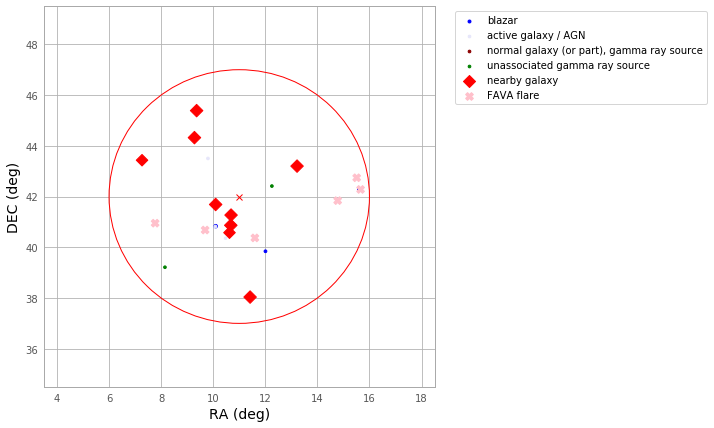

In [4]:
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

import ploterrcirc

ploterrcirc.ploterrcirc(RA, DEC, ERR, RA1, RA2, DEC1, DEC2)

import plotsrcs

plotsrcs.plotsrcs(pltRA, pltDEC, srctype, pltsize, labels, markers)

In [ ]:
run -p SkyPlotter.py -r 11 -d 44 -e 5 -t '2004-07-10 12:00:00' -s '2017-07-20 13:00:00'